# Imports
---

In [ ]:
                                                                                                                                                                                                                                                                                                                           import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from imblearn.under_sampling import RandomUnderSampler

# Cargar Data
___

In [ ]:
#index col para que sepa que esa corresponde a los indices
df_data = pd.read_csv('./ds_pb.csv', index_col=[0])

# Split target y patrón
___

In [ ]:
df_data.columns

Index(['Compound', 'xBi(Me1Me2)O3', 'xPT', 'Tolerance_Factor',
       'Ionic_Displacements', 'Ferroelectric_Tc_in_Kelvin'],
      dtype='object')

- Split

In [ ]:
# Separo datos entre target vs otrasFeatures
x = df_data.drop(['Ferroelectric_Tc_in_Kelvin', 'Compound', 'xBi(Me1Me2)O3', 'xPT'], axis=1)
x_noise = df_data.drop(['Ferroelectric_Tc_in_Kelvin', 'Compound'], axis=1)
y = df_data['Ferroelectric_Tc_in_Kelvin']

- Validación

In [ ]:
print(x.shape)
print(y.shape)

(132, 2)
(132,)


# Procesamiento de datos
___

> Comprobar si Dataset es balanceado

> Balancear (undersampling o oversampling

> Target categórico a numérico

> Manejo de Features categóricos (valencias) con dummies (One-hot encoding)

> Features categóricos a numéricos

# Análisis exploratorio de datos Particular LR
___

> Análisis de correlación entre variables

- Creo dataset con toda la data

In [ ]:
full_data = pd.concat([y,x], axis=1)
full_data_noise = pd.concat([y,x_noise], axis=1)

- Heatmap de correlación entre variables

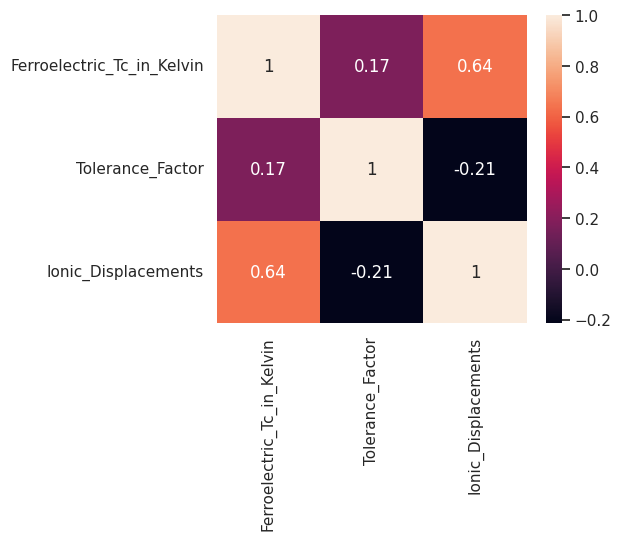

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(full_data.corr(), annot=True)
plt.show()

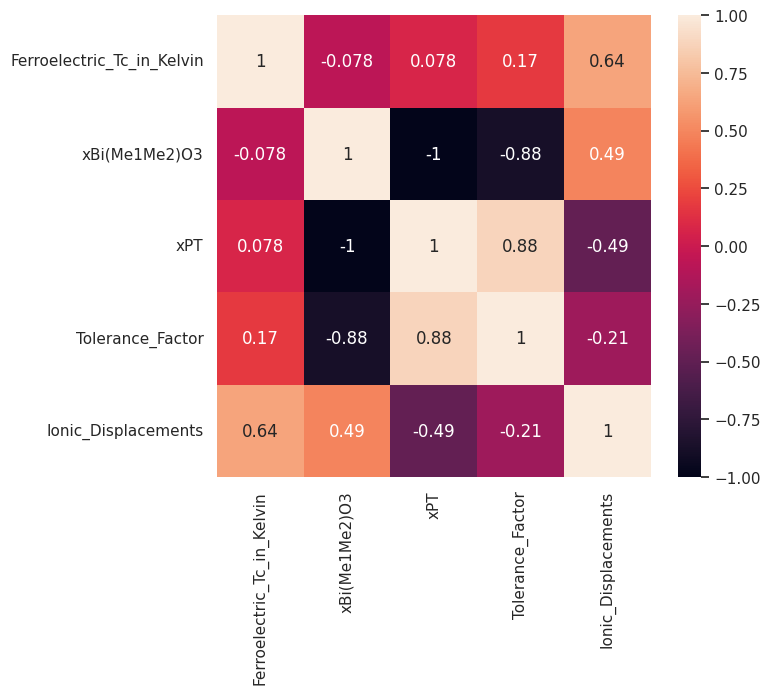

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(full_data_noise.corr(), annot=True)
plt.show()

- Elimino features correlacionados (Eliminar Multicolinealidad)

> Análisis de correlación con Target (Puedo estimar cuales seran los pesos de los features, o eliminar aquellos no relacionados)

- Barplot de correlación

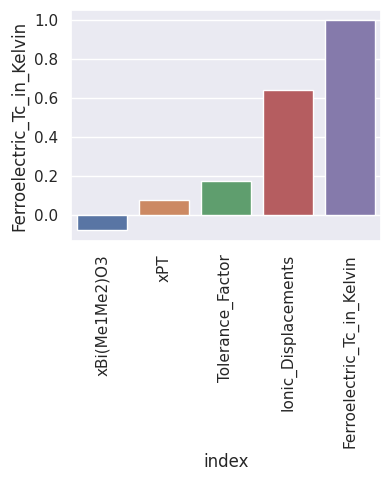

In [ ]:
plt.figure(figsize=(4,3))
#plt.figure(figsize=(25,19))

corrDF = pd.DataFrame(full_data_noise.corr()['Ferroelectric_Tc_in_Kelvin'].sort_values(ascending=True)).reset_index()
corrSplot = sns.barplot(data= corrDF,x='index', y='Ferroelectric_Tc_in_Kelvin')

#plt.bar_label(corrSplot.containers[0])
plt.xlabel='Feature'
plt.ylabel='Correlación'
plt.xticks(rotation=90)
plt.show()

- Eliminar datos (Mitigar overfitting por número de features extenso)

> Gráficos target vs variables categóricas (Gráfico de repeticiones)

- Función para graficar cada variable categórica

- Saco columnas categóricas a graficar

- Subplots por itración sobre la función

> Diagramas de dispersión 3D, data no categórica vs target 

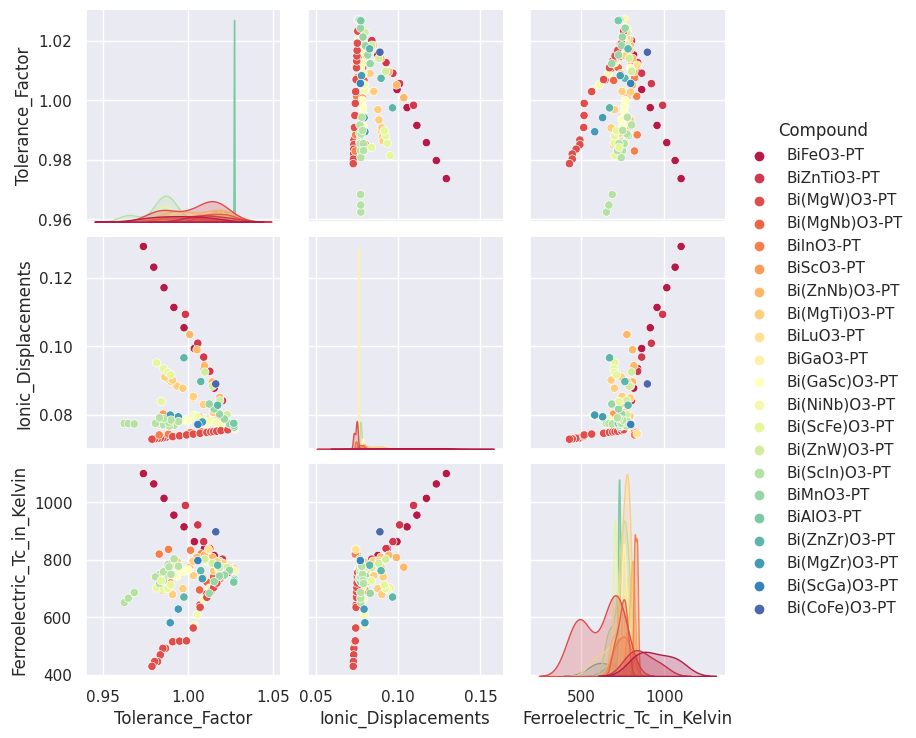

In [ ]:
sns.pairplot(data=df_data.drop(['xBi(Me1Me2)O3', 'xPT'], axis=1), hue='Compound', palette="Spectral" )

# Exportar dataset procesado
___

> Meto al dataset el target, A, B categóricos, para poder reconocerlos

- Renombro las categorías

- Los concateno

In [ ]:
#data_to_export = pd.concat([full_data, y_over, A, B], axis = 1)

- Valido

In [ ]:
full_data

,Ferroelectric_Tc_in_Kelvin,Tolerance_Factor,Ionic_Displacements
0,815.725,1.015227,0.087792
1,839.800,1.009507,0.093507
2,863.813,1.003608,0.099401
3,915.276,0.997531,0.105473
4,956.039,0.991573,0.111427
...,...,...,...
127,728.000,0.985448,0.078862
128,718.000,0.983130,0.079082
129,798.000,1.005669,0.077148
130,728.000,0.984181,0.083906


> Exporto

In [ ]:
full_data.to_csv("ds_pb_toTrain.csv", sep=',')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1238d720-2ec8-40e1-ad99-9d2cd1c1fe59' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>